In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [3]:
data_path = '/home/sean/mea data/027/027_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [4]:
# define mapping of wells to power and width, based on Kelsey's well map
def well_power(unit_name):
    row = mc.get_row_number(unit_name)
    if row == 5:
        return 5
    else:
        return np.floor(100/(2**(row-1)))
    
def well_width(unit_name):
    row, col = mc.get_row_col_number_tuple(unit_name)
    if col <= 2:
        return 1
    elif col <= 4:
        return 2
    elif col <= 6:
        return 0.5
    else:
        if row <= 2:
            return 0.2
        else:
            return 5

In [5]:
def create_well_assignment_filter(cond_name):
    def well_assignment_filter(unit_name):
        power = well_power(unit_name)
        width = well_width(unit_name)
        return power + width == condition_nums[cond_name]
    return well_assignment_filter
    
condition_nums = {
    '100_1': 101,
    '100_2': 102,
    '100_0.5': 100.5,
    '100_0.2': 100.2,
    '50_1': 51,
    '50_2': 52,
    '50_0.5': 50.5,
    '50_0.2': 50.2,
    '25_1': 26,
    '25_2': 27,
    '25_0.5': 25.5,
    '25_5': 30,
    '12_1': 13,
    '12_2': 14,
    '12_0.5': 12.5,
    '12_5': 17,
    '5_1': 6,
    '5_2': 7,
    '5_0.5': 5.5,
    '5_5': 10,
}

well_filter_dict = {cond_name: create_well_assignment_filter(cond_name) for cond_name in condition_nums.iterkeys()}


In [6]:
cat_table = plotting.construct_categorized_dataframe_pulse(data_table, well_filter_dict, well_power, well_width)
cat_table = cat_table.query('unit_name < "F1111"') # delete F row, because no data
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec

In [7]:
cat_table['spike_freq'] = cat_table['spike_freq']/2 # convert from spikes/sec to spikes/pulse
test = cat_table.query('time > "2017-07-16 16:50:00" and time < "2017-07-16 17:19:00"') # delete times at beginning and end of each recording

In [11]:
cat_table.query('condition == "50_2"')

,condition,pulse_power,pulse_width,spike_freq,time,unit_name
0,50_2,50.0,2.0,0.050000,2017-07-16 13:50:43,B4111
1,50_2,50.0,2.0,0.083333,2017-07-16 13:51:43,B4111
2,50_2,50.0,2.0,0.066667,2017-07-16 13:52:43,B4111
3,50_2,50.0,2.0,0.066667,2017-07-16 13:53:43,B4111
4,50_2,50.0,2.0,0.075000,2017-07-16 13:54:43,B4111
5,50_2,50.0,2.0,0.058333,2017-07-16 13:55:43,B4111
6,50_2,50.0,2.0,0.058333,2017-07-16 13:56:43,B4111
7,50_2,50.0,2.0,0.041667,2017-07-16 13:57:43,B4111
8,50_2,50.0,2.0,0.058333,2017-07-16 13:58:43,B4111
9,50_2,50.0,2.0,0.041667,2017-07-16 13:59:43,B4111


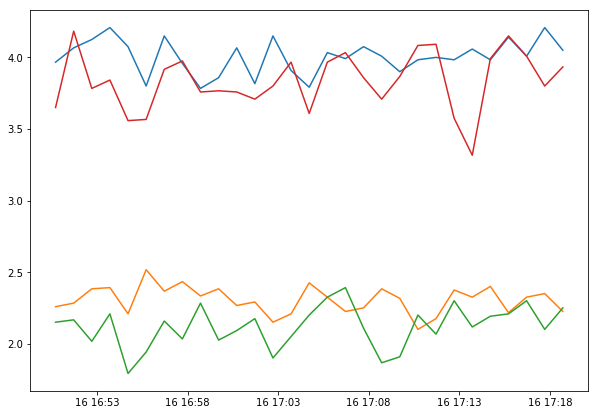

In [81]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(test.query('unit_name == "B4121" or unit_name == "B4122" or unit_name == "B4234" or unit_name == "B4241"'))

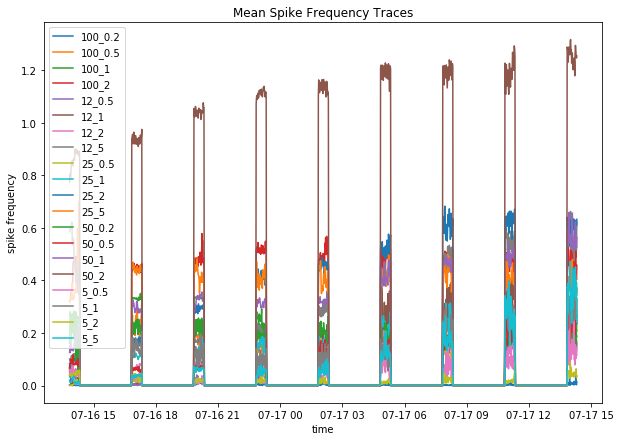

In [114]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)

In [115]:
def divide_time(df, row, col):
    rec_start_times = pd.date_range('2017-07-16 13:50:00', periods = 9, freq = '3H') #cut off a minute at beginning
    rec_stop_times = pd.date_range('2017-07-16 14:19:00', periods = 9, freq = '3H')
    time_string = df[col].iloc[row]
    time_index = 0
    for start, stop in zip(rec_start_times, rec_stop_times):
        if (time_string >= start and time_string <= stop):
            return str(time_index)
        else:
            time_index += 1

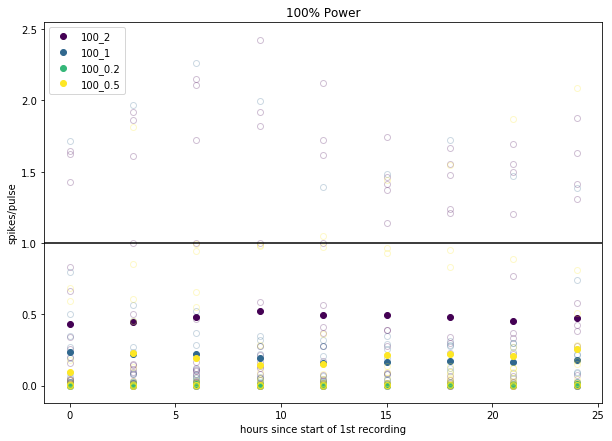

In [116]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('pulse_power == 100'), "100% Power", divide_time)

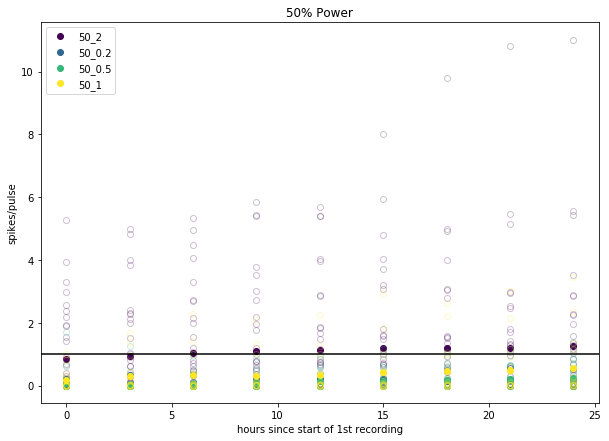

In [117]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('pulse_power == 50'), "50% Power", divide_time)

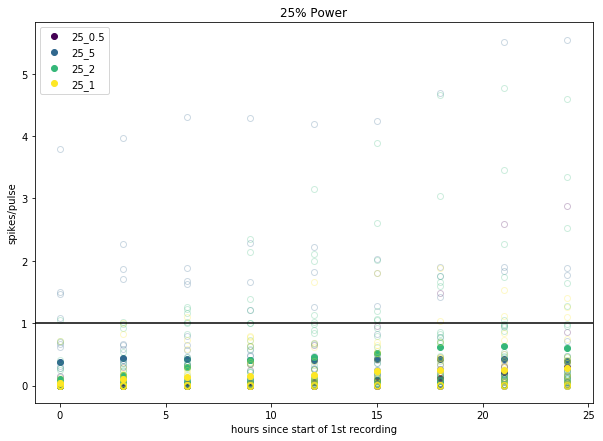

In [118]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('pulse_power == 25'), "25% Power", divide_time)

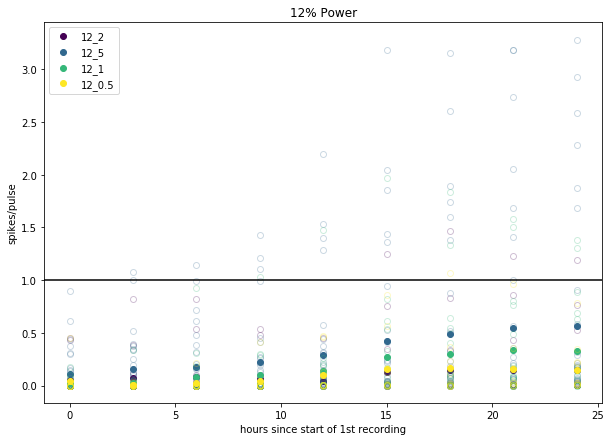

In [119]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('pulse_power == 12'), "12% Power", divide_time)

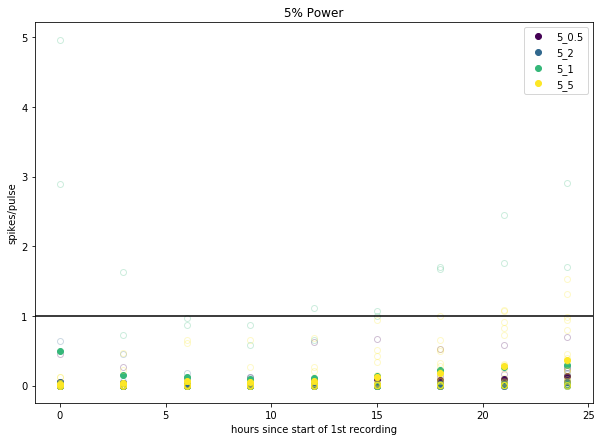

In [120]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('pulse_power == 5'), "5% Power", divide_time)

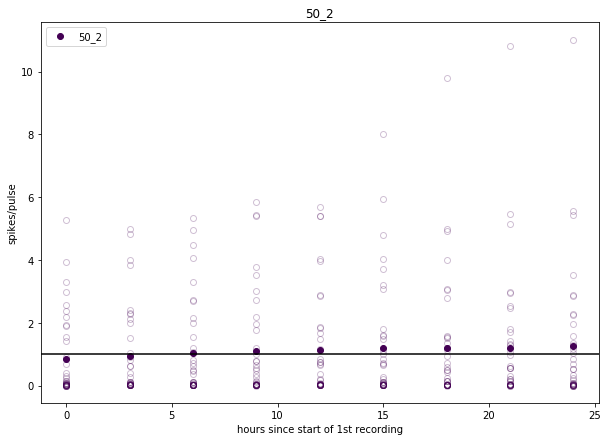

In [121]:
plt.figure(figsize=(10,7))
plotting.plot_unit_points_plus_means(cat_table.query('condition == "50_2"'), "50_2", divide_time)